In [7]:
pip install Jinja2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [9]:
data=pd.read_csv('D:\Capstone Project-1\Datasets\cardekho_updated.csv')
print(f'''number of rows - {data.shape[0]}
number of columns - {data.shape[1]}''')

number of rows - 19974
number of columns - 13


In [10]:
data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [11]:
def null_count():
    return pd.DataFrame({'features': data.columns,
                'dtypes': data.dtypes.values,
                'NaN count': data.isnull().sum().values,
                'NaN percentage': data.isnull().sum().values/data.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,object,0,0.000000
2,new_price,object,10410,0.521178
3,year,int64,0,0.000000
4,seller_type,object,0,0.000000
5,km_driven,object,0,0.000000
6,owner_type,object,0,0.000000
7,fuel_type,object,0,0.000000
8,transmission_type,object,0,0.000000
9,mileage,object,160,0.008010


In [12]:
for i in range(data.shape[0]):
    try:
        price = float(data['selling_price'][i].split(' ')[0])
        digit = data['selling_price'][i].split(' ')[1]
        if digit == 'Lakh*':
            price = price * 100000
            data['selling_price'][i] = price
        elif digit == 'Cr*':
            price = price * 10000000
            data['selling_price'][i] = price
    except:
        price = data['selling_price'][i][:-1]
        price = price.replace(',', '')
        data['selling_price'][i] = float(price)

C:\Users\harshil\AppData\Local\Temp\ipykernel_13604\1562082533.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['selling_price'][i] = price
C:\Users\harshil\AppData\Local\Temp\ipykernel_13604\1562082533.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['selling_price'][i] = float(price)
C:\Users\harshil\AppData\Local\Temp\ipykernel_13604\1562082533.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['selling_price

In [13]:

data['km_driven'] = data['km_driven'].str.split(' ', n=1, expand=True)[0]
data['km_driven'] = data['km_driven'].str.replace(',','')
data['mileage'] = data['mileage'].str.split(' ', expand=True)[0].str.split('e', expand=True)[2]
data['engine'] = data['engine'].str.split(' ', expand=True)[0].str.split('e',expand=True)[1]
data['max_power'] = data['max_power'].str.split(' ', expand=True)[1].str.split('r',expand=True)[1]
data['seats'] = data['seats'].str.split('s', expand=True)[1]

In [14]:
cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

for col in cols:
    try:
        data[col] = data[col].astype(int)
    except:
        data[col] = data[col].astype(float)

In [15]:
data['company'] = data['full_name'].str.split(' ', expand=True)[0]

In [16]:
data.drop(columns=['new_price','full_name','owner_type'], axis=1, inplace=True)
data.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,120000,2012,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,550000,2016,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,215000,2010,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,225999,2012,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,570000,2015,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,19974.0,739294.432612,910400.116520,25000.0,340000.00,520000.0,785000.00,39500000.0
year,19974.0,2014.526134,3.248791,1991.0,2013.00,2015.0,2017.00,2021.0
km_driven,19974.0,58238.894663,51727.595500,100.0,31114.00,52000.0,74000.00,3800000.0
mileage,19814.0,19.503637,4.298090,4.0,16.95,19.3,22.32,120.0
engine,19864.0,1477.805981,519.843056,72.0,1197.00,1248.0,1582.00,6752.0
max_power,19637.0,99.448762,43.784904,25.4,73.94,86.8,114.00,626.0
seats,19887.0,5.319807,0.837676,2.0,5.00,5.0,5.00,14.0


In [18]:
data.describe(include='O')

,seller_type,fuel_type,transmission_type,company
count,19974,19974,19974,19974
unique,3,5,2,42
top,Dealer,Diesel,Manual,Maruti
freq,11970,9815,16025,5648


C:\Users\harshil\AppData\Local\Temp\ipykernel_13604\2398836656.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(),cmap='Blues', mask=np.triu(data.corr(), k=1), cbar=False, annot=True,annot_kws=dict(fontsize=4))


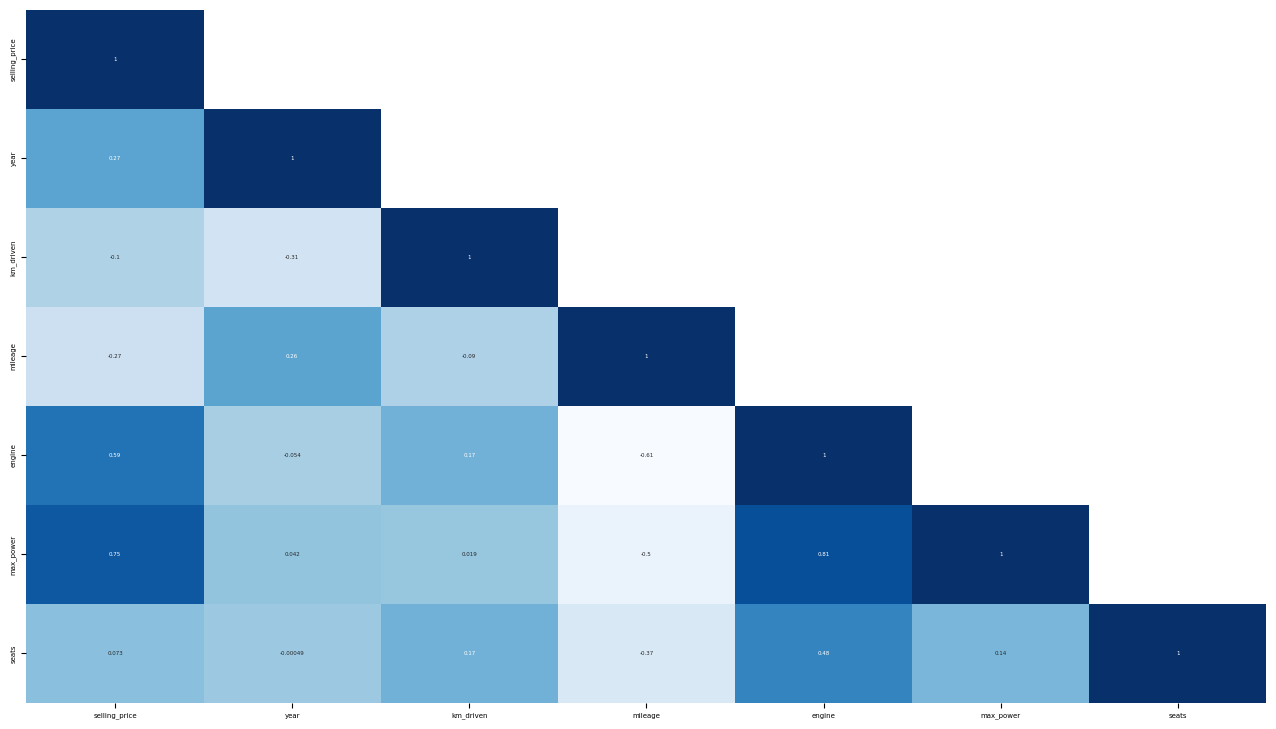

In [19]:
fig = plt.figure(figsize=(16,9))
ax = sns.heatmap(data.corr(),cmap='Blues', mask=np.triu(data.corr(), k=1), cbar=False, annot=True,annot_kws=dict(fontsize=4))
ax.set_facecolor('white')
ax.tick_params(labelsize=5)
plt.show()

In [20]:
null_count()

,features,dtypes,NaN count,NaN percentage
0,selling_price,int32,0,0.000000
1,year,int64,0,0.000000
2,seller_type,object,0,0.000000
3,km_driven,int32,0,0.000000
4,fuel_type,object,0,0.000000
5,transmission_type,object,0,0.000000
6,mileage,float64,160,0.008010
7,engine,float64,110,0.005507
8,max_power,float64,337,0.016872
9,seats,float64,87,0.004356


In [21]:
for i in ['mileage', 'engine', 'max_power', 'seats']:
    company_name = data[data[i].isnull()]['company'].value_counts().index[0]
    if data[i].nunique()>10:
        values = data[data['company']==company_name][i].mean()
    else:
        values = data[data['company']==company_name][i].median()
        
    data[i].fillna(values, inplace=True)

In [22]:
data = data[data['selling_price'] < 20000000]
data = data[data['km_driven'] < 1000000]
data = data[data['mileage'] < 100]
data = data[data['engine'] < 6100]
data = data[data['max_power'] < 530]
data = data.reset_index(drop=True)

In [23]:
company_name = data.company.value_counts().index[:15]
for i in range(data.shape[0]):
    if data['company'][i] in company_name:
         continue
    else:
        data['company'][i] = 'others'


C:\Users\harshil\AppData\Local\Temp\ipykernel_13604\2644501224.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['company'][i] = 'others'


In [24]:
data = pd.get_dummies(data=data, columns=['seller_type','fuel_type','transmission_type','company'], drop_first=True)
data.shape

(19959, 29)

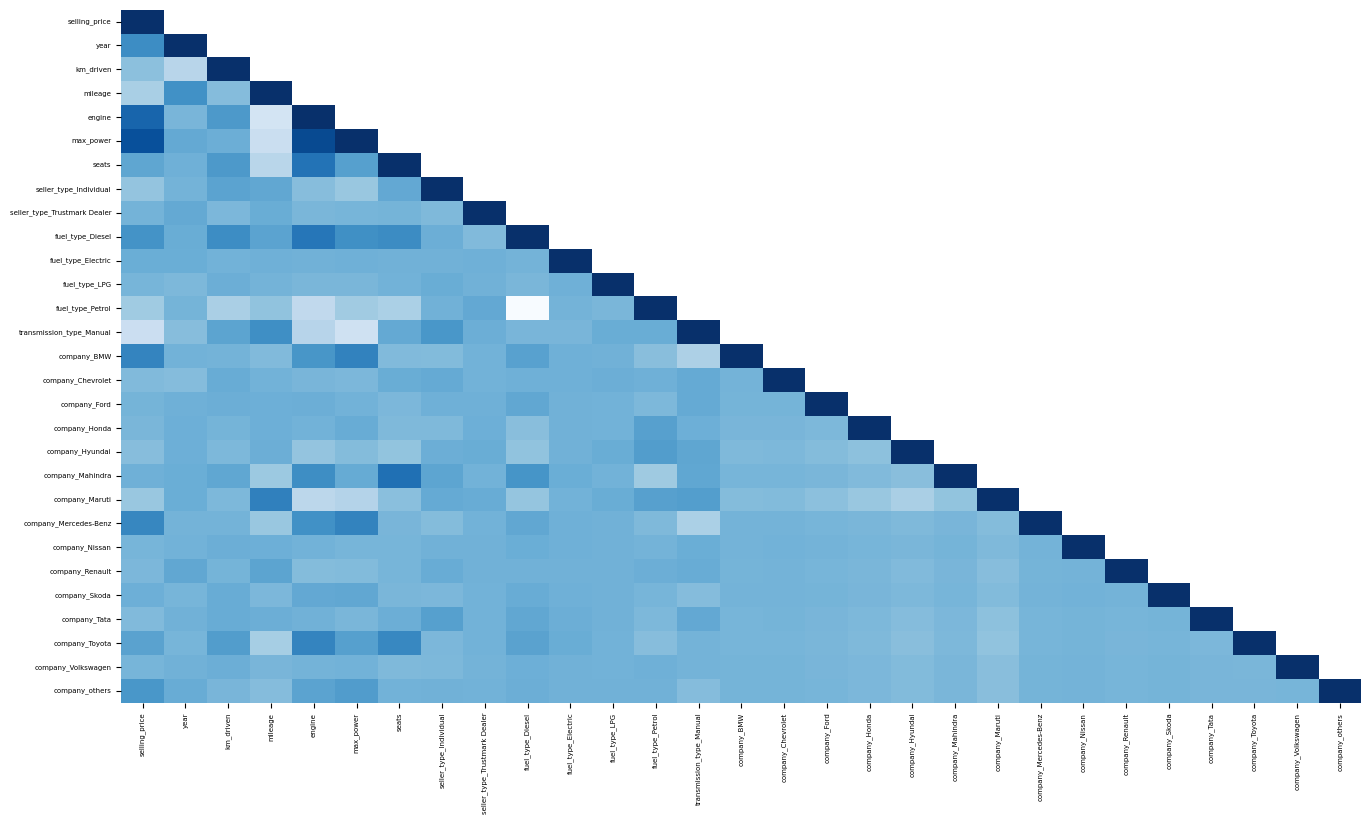

In [25]:
fig = plt.figure(figsize=(16,9))
ax = sns.heatmap(data.corr(), cmap='Blues', mask=np.triu(data.corr(), k=1), cbar=False,
                 annot_kws=dict(fontsize=4))
ax.set_facecolor('white')
ax.tick_params(labelsize=5)
plt.show()

In [26]:
x = data.iloc[:,1:]
y = data['selling_price']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20,random_state=25)

In [27]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [28]:
def do_prediction(classifier):
    
    # training the classifier on the dataset
    classifier.fit(xtrain, ytrain)
    
    #Do prediction and evaluting the prediction
    prediction = classifier.predict(xtest)
    cross_validation_score = cross_val(xtrain, ytrain, classifier)
    error = mean_absolute_error(ytest, prediction)
    
    return error, cross_validation_score

def cross_val(xtrain, ytrain, classifier):
    
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classifier, X = xtrain, y = ytrain, cv = 5)
    return accuracies.mean()

In [29]:
model_1 = LinearRegression()
error, score = do_prediction(model_1)

print('Linear Regression MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Linear Regression MAE: 235187.72
Cross validation score: 0.71


In [30]:
model_3 = RandomForestRegressor()
error, score = do_prediction(model_3)

print('Random Forest Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))

Random Forest Regressor MAE: 102564.12
Cross validation score: 0.92


In [31]:
import pickle
file_name='my_file.pkl'
f = open(file_name,'wb')
pickle.dump(model_1,f)
f.close()